# 2: Spherical wind
-------------------


In [1]:
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt
import magritte.tools    as tools
import magritte.setup    as setup
import magritte.core     as magritte

from astropy import units, constants

In [2]:
# Define names for the data files
model_file = 'output/magritte_spherical_wind.hdf5'
lamda_file = 'data/co.txt'

You will modify two parameters to find the best fit model: the mass-loss rate and the power-law exponent of the temperature profile

In [23]:
# Define the mass-loss rate (Mdot, in solar masses per year) and temperature profile exponent (epsilon)
Mdot     = 1.9e-5
epsilon  =  0.5

AttributeError: 'numpy.float64' object has no attribute 'to'

In [4]:
# Now define the other parameters we will need
distance = (740     * units.pc            ).si.value  # distance to WX Psc
r_star   = (520     * constants.R_sun     ).si.value  # stellar radius
r_in     =  1.7     * r_star                          # radius of the inner edge of the circumstellar envelope
r_out    = (1.1e+17 * units.cm            ).si.value  # radius of the outer edge of the circumstellar envelope
v_inf    = (19.8    * units.km/units.s    ).si.value  # expansion velocity of the envelope
T_star   = (2750    * units.K             ).si.value  # effective temperature of the star
T_in     = (1000    * units.K             ).si.value  # temperature at r_in = dust condensation temperature
xCO      =  1.0e-4                                    # fractional CO abundance (relative to H2)
v_turb   = (1.5e+0  * units.km   /units.s ).si.value  # turbulent velocity

# Give Mdot in SI units
Mdot_si = (Mdot  * units.M_sun/units.yr).si.value

# Define the number and array of radial points
npoints  = 512
rs = np.logspace(np.log10(r_in), np.log10(r_out), npoints, dtype=np.float64)

# Define the other arrays
v_r = v_inf  * np.ones_like(rs)                 # expansion velocity
trb = v_turb * np.ones_like(rs)                 # turbulent velocity
tmp = T_in * (r_in / rs)**epsilon               # temperature
rho = Mdot_si / (4.0 * np.pi * rs**2 * v_r)     # density
nH2 = (constants.N_A.si.value / 2.02e-3) * rho  # H2 density
nCO = xCO * nH2                                 # CO density

In [5]:
# Set up a spherically symmetric Magritte model with the parameters defined above
model = magritte.Model ()
model.parameters.set_spherical_symmetry(True)
model.parameters.set_model_name        (model_file)
model.parameters.set_dimension         (1)
model.parameters.set_npoints           (npoints)
model.parameters.set_nrays             (48)
model.parameters.set_nspecs            (3)
model.parameters.set_nlspecs           (1)
model.parameters.set_nquads            (11)
model.parameters.pop_prec              =1e-4

model.geometry.points.position.set([[r,                      0, 0] for r in rs])
model.geometry.points.velocity.set([[v/constants.c.si.value, 0, 0] for v in v_r])

model.chemistry.species.abundance = [[CO, H2, 0.0] for (CO, H2) in zip(nCO, nH2)]
model.chemistry.species.symbol    = ['CO', 'H2', 'e-']

model.thermodynamics.temperature.gas  .set( tmp                         )
model.thermodynamics.turbulence.vturb2.set((trb/constants.c.si.value)**2)

model = setup.set_Delaunay_neighbor_lists (model)
model = setup.set_Delaunay_boundary       (model)
model = setup.set_boundary_condition_CMB  (model)
model = setup.set_rays_spherical_symmetry (model)
model = setup.set_linedata_from_LAMDA_file(model, lamda_file)
model = setup.set_quadrature              (model)

# Write and read model to initialize all variables
model.write()
model.read ()

Writing parameters...
Writing points...
Writing rays...
Writing boundary...
Writing chemistry...
Writing species...
Writing thermodynamics...
Writing temperature...
Writing turbulence...
Writing lines...
Writing lineProducingSpecies...
Writing linedata...
ncolpoar = 2
--- colpoar = 0
Writing collisionPartner...
(l, c) = 0, 0
--- colpoar = 1
Writing collisionPartner...
(l, c) = 0, 1
Writing quadrature...
Writing populations...
Writing radiation...
Writing frequencies...
                                           
-------------------------------------------
  Reading Model...                         
-------------------------------------------
 model file = output/magritte_spherical_wind.hdf5
-------------------------------------------
Reading parameters...
Reading points...
Reading rays...
Reading boundary...
Reading chemistry...
Reading species...
Reading thermodynamics...
Reading temperature...
Reading turbulence...
Reading lines...
Reading lineProducingSpecies...
Reading linedata...


In [6]:
# Initialize model with LTE level populations
model.compute_spectral_discretisation ()
model.compute_inverse_line_widths     ()
model.compute_LTE_level_populations   ()

Computing spectral discretisation...
Computing inverse line widths...
Computing LTE level populations...


0

In [7]:
# Iterate level populations until statistical equilibrium
model.compute_level_populations_sparse (True, 200)

Starting iteration 0
using ng acceleration? 0
Computing the radiation field...
Computing radiation field...
--- rr = 0
--- rr = 1
--- rr = 2
--- rr = 3
--- rr = 4
--- rr = 5
--- rr = 6
--- rr = 7
--- rr = 8
--- rr = 9
--- rr = 10
--- rr = 11
--- rr = 12
--- rr = 13
--- rr = 14
--- rr = 15
--- rr = 16
--- rr = 17
--- rr = 18
--- rr = 19
--- rr = 20
--- rr = 21
--- rr = 22
--- rr = 23
Tot | Compute Radiation Field : 139.540644 seconds
Tot | Compute Statistical Equilibrium : 0.020371 seconds
Already 34.475 % converged!
Starting iteration 1
using ng acceleration? 0
Computing the radiation field...
Computing radiation field...
--- rr = 0
--- rr = 1
--- rr = 2
--- rr = 3
--- rr = 4
--- rr = 5
--- rr = 6
--- rr = 7
--- rr = 8
--- rr = 9
--- rr = 10
--- rr = 11
--- rr = 12
--- rr = 13
--- rr = 14
--- rr = 15
--- rr = 16
--- rr = 17
--- rr = 18
--- rr = 19
--- rr = 20
--- rr = 21
--- rr = 22
--- rr = 23
Tot | Compute Radiation Field : 278.412562 seconds
Tot | Compute Statistical Equilibrium : 0

6

ompute Radiation Field : 556.671008 seconds
Tot | Compute Statistical Equilibrium : 0.077037 seconds
Already 91.6968 % converged!
Starting iteration 4
using ng acceleration? 0
Computing the radiation field...
Computing radiation field...
--- rr = 0
--- rr = 1
--- rr = 2
--- rr = 3
--- rr = 4
--- rr = 5
--- rr = 6
--- rr = 7
--- rr = 8
--- rr = 9
--- rr = 10
--- rr = 11
--- rr = 12
--- rr = 13
--- rr = 14
--- rr = 15
--- rr = 16
--- rr = 17
--- rr = 18
--- rr = 19
--- rr = 20
--- rr = 21
--- rr = 22
--- rr = 23
Tot | Compute Radiation Field : 697.459885 seconds
Tot | Compute Statistical Equilibrium : 0.094837 seconds
Already 98.9425 % converged!
Starting iteration 5
using ng acceleration? 0
Computing the radiation field...
Computing radiation field...
--- rr = 0
--- rr = 1
--- rr = 2
--- rr = 3
--- rr = 4
--- rr = 5
--- rr = 6
--- rr = 7
--- rr = 8
--- rr = 9
--- rr = 10
--- rr = 11
--- rr = 12
--- rr = 13
--- rr = 14
--- rr = 15
--- rr = 16
--- rr = 17
--- rr = 18
--- rr = 19
--- rr = 

In [13]:
# Define the different lines by name, line number, and beam FWHM in arcsec (for the APEX telescope)
lines = {'CO32':[2, 17.3], 'CO43':[3, 13.3], 'CO76':[6, 7.7]}

# Define the radial velocity of the source (in km/s) so we can shift the model spectrum by this amount
v_rad = 9.0

# Define a function to calculate chi2
def chi2(data_flux, model_flux, sigma):
    data_flux = np.array(data_flux)
    model_flux = np.array(model_flux)
    sigma = np.array(sigma)
    chi2 = np.sum((model_flux-data_flux)**2/sigma)
    return chi2

In [32]:
# Calculate the model spectra for each CO transition
for line in lines:
    line_nr = lines[line][0]
    FWHM = lines[line][1] * units.arcsec
    nfreqs = 256
    vpix   = 400.0   # velocity pixel size [m/s]
    fcen = model.lines.lineProducingSpecies[0].linedata.frequency[line_nr]  # rest frequency of the given transition
    dd   = vpix * (nfreqs-1)/2 / magritte.CC
    fmin = fcen - fcen*dd
    fmax = fcen + fcen*dd

    model.compute_spectral_discretisation(fmin, fmax, nfreqs)
    model.compute_image(model.parameters.hnrays()-1)
    
    # Extract the image data from Magritte
    image_nr = -1
    imx = np.array(model.images[image_nr].ImX)
    imI = np.array(model.images[image_nr].I)

    # Calculate integration weights and convert to Jansky from SI units
    b  = imx # impact factors
    b0 = np.concatenate(([0.0], b))
    ds = np.pi * (b0[1:] - b0[:-1]) * (b0[1:] + b0[:-1]) / distance**2 / 1.0e-26

    # Calculate beam to convolve with model intensities
    FWHM_m = ((FWHM * (distance * units.meter).to(units.parsec)) * units.au).si.value  # convert to meters
    sigma  = FWHM_m / (2.0 * np.sqrt(2.0 * np.log(2)))
    beam   = np.exp(-0.5*(b/sigma)**2) / (np.sqrt(2.0 * np.pi) * sigma)
    beam   = beam / beam[0]  
    
    # Calculate intensity (flux density in Jy)
    I_no_beam  = np.einsum('if, i -> f', imI,        ds)  # total model intensity without taking the beam into account
    I          = np.einsum('if, i -> f', imI, beam * ds)  # model intensity as seen with a beam size of <FWHM>
    
    # Calculate frequencies and hence velocities
    freqs = np.array(model.radiation.frequencies.nu)[0]
    velos = (freqs - fcen) / fcen * magritte.CC / 1.0e3
    
    # Save output spectrum
    with open('output/WX_Psc_model_{}_Mdot{}_epsilon{}.dat'.format(line, Mdot, epsilon), 'w+') as f:
        f.write('#Velocity(km/s),FluxDensity(Jy)\n')
        for i in range(len(velos)):
            f.write('{} {}\n'.format(velos[i], I[i]))

Computing spectral discretisation...
Computing image...
Computing spectral discretisation...
Computing image...
Computing spectral discretisation...
Computing image...


Now plot the output model spectra against the data, and calculate the $\chi^2$ value for goodness of fit

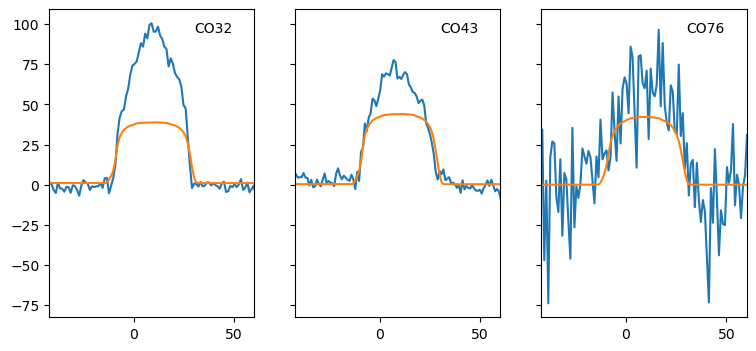

In [43]:
data_flux  = []
model_flux = []
sigma = []

## NB need to extract model spec on same velocity scale as the data, for ease of chi2. 
## Also make sure calc chi2 only for region around line, so guess we will need a mask after all 

fig, axs = plt.subplots(1, 3, figsize=(9,4), sharey='row')
for i, line in enumerate(lines):
    # Read in data for the given line
    velo, flux_density = np.loadtxt('data/WX_Psc_{}_Jy.dat'.format(line), unpack=True)
    data_flux += list(flux_density)
    rms = np.std(flux_density[:100])
    sigma += list(rms*np.ones(len(flux_density)))
    # Read in model for the given line
    velo_model, intensity = np.loadtxt('output/WX_Psc_model_{}_Mdot{}_epsilon{}.dat'.format(line, Mdot, epsilon), unpack=True)
    model_flux += list(intensity)
    
    axs[i].plot(velo, flux_density, label='data')
    axs[i].plot(velo_model+v_rad, intensity, label='model')
    axs[i].set_xlim(-42, 60)
    axs[i].text(30, 95, line)


In [48]:
line='CO32'
velo, flux_density = np.loadtxt('data/WX_Psc_{}_Jy.dat'.format(line), unpack=True)
velo

array([-424.952, -423.894, -422.836, -421.778, -420.719, -419.661,
       -418.603, -417.544, -416.486, -415.428, -414.369, -413.311,
       -412.253, -411.194, -410.136, -409.078, -408.02 , -406.961,
       -405.903, -404.845, -403.786, -402.728, -401.67 , -400.611,
       -399.553, -398.495, -397.437, -396.378, -395.32 , -394.262,
       -393.203, -392.145, -391.087, -390.028, -388.97 , -387.912,
       -386.853, -385.795, -384.737, -383.679, -382.62 , -381.562,
       -380.504, -379.445, -378.387, -377.329, -376.27 , -375.212,
       -374.154, -373.096, -372.037, -370.979, -369.921, -368.862,
       -367.804, -366.746, -365.687, -364.629, -363.571, -362.512,
       -361.454, -360.396, -359.338, -358.279, -357.221, -356.163,
       -355.104, -354.046, -352.988, -351.929, -350.871, -349.813,
       -348.755, -347.696, -346.638, -345.58 , -344.521, -343.463,
       -342.405, -341.346, -340.288, -339.23 , -338.171, -337.113,
       -336.055, -334.997, -333.938, -332.88 , -331.822, -330.

In [44]:
chi2(data_flux, model_flux, sigma)

ValueError: operands could not be broadcast together with shapes (768,) (1873,) 